# ICE Challenge #1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import joblib
import random
import xgboost as xgb
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    precision_score, 
    recall_score, 
    f1_score
)

In [2]:
df = pd.read_csv('./ICE-1/wine-training.csv')
df_holdout = pd.read_csv('./ICE-1/wine-holdout.csv')

In [ ]:
display(df.describe())
display(df.info())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline,wine
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,12.971008,2.413361,2.372101,19.577311,100.857143,2.278319,2.014538,0.364034,1.588739,5.025126,0.956353,2.593782,741.588235,0.949580
std,0.851975,1.107837,0.268258,3.506735,15.167587,0.662930,1.020149,0.127201,0.578687,2.203922,0.236996,0.734598,307.645195,0.779491
min,11.030000,0.890000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000,0.000000
25%,12.290000,1.645000,2.235000,17.450000,88.000000,1.690000,1.145000,0.270000,1.245000,3.230000,0.770000,1.825000,497.500000,0.000000
50%,12.960000,1.900000,2.360000,19.500000,98.000000,2.300000,2.140000,0.340000,1.560000,4.800000,0.960000,2.780000,660.000000,1.000000
75%,13.710000,3.170000,2.525000,21.500000,108.000000,2.815000,2.870000,0.450000,1.935000,6.165000,1.120000,3.170000,961.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,10.800000,1.710000,4.000000,1547.000000,2.000000


In [ ]:
# Only needed to have ran once not repeatedly.
# sns.pairplot(data=df, hue='wine')
# plt.savefig('.\\ICE-1\\matrix_plot.png', dpi=300)

In [18]:
X = df.drop(columns='wine')
y = df['wine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=117)

In [19]:
mdl = xgb.XGBClassifier(random_state=117, max_depth=3)
mdl.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [35]:
pred_main = mdl.predict(X_test)
accuracy = accuracy_score(y_test, pred_main)
precision = precision_score(y_test, pred_main, average='weighted')
recall = recall_score(y_test, pred_main, average='weighted')
f1 = f1_score(y_test, pred_main, average='weighted')
display(accuracy)
display(precision)
display(recall)
display(f1)

0.9583333333333334

np.float64(0.9652777777777778)

np.float64(0.9583333333333334)

np.float64(0.9593214756258236)

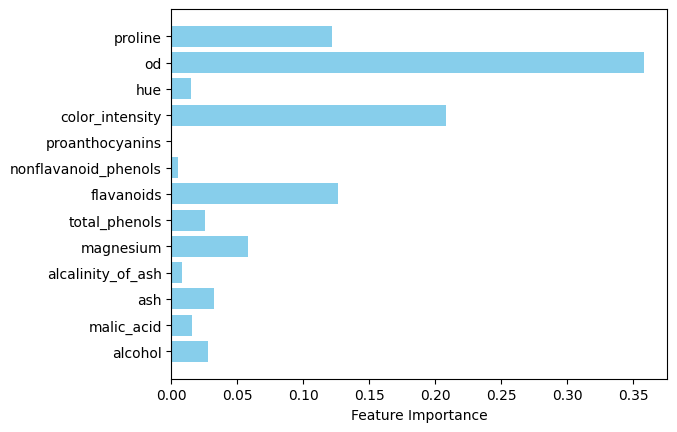

In [41]:
feat = mdl.feature_importances_

plt.barh(df.drop(columns=['wine']).columns, feat, color='skyblue', label='Main')
plt.xlabel("Feature Importance")
plt.show()

<Axes: >

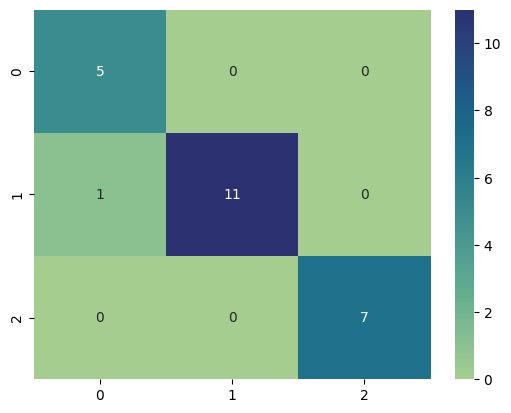

In [42]:
cm = confusion_matrix(y_test, pred_main)
sns.heatmap(cm, annot=True, cmap='crest')

In [49]:
pred_holdout = mdl.predict(df_holdout)
pred_data = pd.DataFrame(pred_holdout)
pred_data.to_csv('./ICE-1/Ezekial_Curran-ice1-predictions.csv', index=False)

In [ ]:
# joblib.dump(mdl, 'ICE-1\\oddly_good_model.pkl')
# joblib.dump(X_train, 'ICE-1\\X_train_oodly_good.pkl')
# joblib.dump(X_test, 'ICE-1\\X_test_oodly_good.pkl')
# joblib.dump(y_train, 'ICE-1\\y_train_oodly_good.pkl')
# joblib.dump(y_test, 'ICE-1\\y_test_oodly_good.pkl')

['ICE-1\\y_test_oodly_good.pkl']

# A Composition of many random states

In [57]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline', 'wine'],
      dtype='object')

In [69]:
rdm_mdls = []
rdm_combis = []
rdm_nmbrs = []
feat_vals = pd.DataFrame(columns=['Random Split', 'Random Model', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline'])
rdm_stats = pd.DataFrame(columns=['Random Split', 'Random Model', 'Accuracy', 'F1_Score', 'Recall_Score', 'Precision_Score'])

# DO NOT LET THE RANGE GO HIGH, REMEMBER n!, n over 150 is undefined because it is too big, limit to at most 100
# 
for i in range(120):
    ran_int = random.randint(1, 10000)
    rdm_nmbrs.append(ran_int)

for combi in itertools.combinations(rdm_nmbrs, 2):
    rdm_combis.append(list(combi))

In [70]:
X_rdm = df.copy().drop(columns=['wine'])
y_rdm = df['wine']

for i in range(0, len(rdm_combis)):
    combi_model = xgb.XGBClassifier(random_state=rdm_combis[i][1], max_depth=3)
    X_tmp_trn, X_tmp_tst, y_tmp_trn, y_tmp_tst = train_test_split(X_rdm, y_rdm, test_size=0.2, random_state=rdm_combis[i][0])

    combi_model.fit(X_tmp_trn, y_tmp_trn)
    rdm_mdls.append(combi_model)
    pred = combi_model.predict(X_tmp_tst)
    accuracy_tmp = accuracy_score(y_tmp_tst, pred)
    precision_tmp = precision_score(y_tmp_tst, pred, average='weighted')
    recall_tmp = recall_score(y_tmp_tst, pred, average='weighted')
    f1_tmp = f1_score(y_tmp_tst, pred, average='weighted')
    mdl_feats = combi_model.feature_importances_

    feat_tmp = pd.DataFrame([rdm_combis[i][:2] + list(mdl_feats)], columns=['Random Split', 'Random Model', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline'])
    feat_vals = pd.concat([feat_vals, feat_tmp], ignore_index=True)
    new_data = pd.DataFrame([[rdm_combis[i][0], rdm_combis[i][1], accuracy_tmp, f1_tmp, recall_tmp, precision_tmp]], columns=['Random Split', 'Random Model', 'Accuracy', 'F1_Score', 'Recall_Score', 'Precision_Score'])
    rdm_stats = pd.concat([rdm_stats, new_data], ignore_index=True)

C:\Users\Zhenterigone\AppData\Local\Temp\ipykernel_17512\121759865.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  feat_vals = pd.concat([feat_vals, feat_tmp], ignore_index=True)
C:\Users\Zhenterigone\AppData\Local\Temp\ipykernel_17512\121759865.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rdm_stats = pd.concat([rdm_stats, new_data], ignore_index=True)


In [74]:
rdm_stats.tail(5)

,Random Split,Random Model,Accuracy,F1_Score,Recall_Score,Precision_Score
7135,6449,2459,0.916667,0.917827,0.916667,0.932292
7136,6449,2607,0.916667,0.917827,0.916667,0.932292
7137,279,2459,0.958333,0.958944,0.958333,0.964286
7138,279,2607,0.958333,0.958944,0.958333,0.964286
7139,2459,2607,0.958333,0.958816,0.958333,0.963542


In [72]:
res_columns = ['Accuracy', 'F1_Score', 'Recall_Score', 'Precision_Score']
result = rdm_stats[res_columns].agg(['median', 'mean', 'min', 'max'])

In [73]:
display(result)

,Accuracy,F1_Score,Recall_Score,Precision_Score
median,0.958333,0.958120,0.958333,0.962963
mean,0.944579,0.944517,0.944579,0.952858
min,0.750000,0.755903,0.750000,0.810847
max,1.000000,1.000000,1.000000,1.000000


In [75]:
feat_vals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140 entries, 0 to 7139
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Random Split          7140 non-null   object 
 1   Random Model          7140 non-null   object 
 2   alcohol               7140 non-null   float32
 3   malic_acid            7140 non-null   float32
 4   ash                   7140 non-null   float32
 5   alcalinity_of_ash     7140 non-null   float32
 6   magnesium             7140 non-null   float32
 7   total_phenols         7140 non-null   float32
 8   flavanoids            7140 non-null   float32
 9   nonflavanoid_phenols  7140 non-null   float32
 10  proanthocyanins       7140 non-null   float32
 11  color_intensity       7140 non-null   float32
 12  hue                   7140 non-null   float32
 13  od                    7140 non-null   float32
 14  proline               7140 non-null   float32
dtypes: float32(13), objec

In [77]:
feat_cols = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od', 'proline']
feat_res = feat_vals[feat_cols].agg(['median', 'mean', 'min', 'max'])

In [78]:
display(feat_res)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od,proline
median,0.029870,0.011355,0.008433,0.008715,0.031455,0.016351,0.123393,0.003559,0.003780,0.180594,0.019447,0.387870,0.162503
mean,0.032658,0.017493,0.014011,0.010399,0.034841,0.026739,0.155281,0.005211,0.006883,0.188751,0.026556,0.317401,0.163776
min,0.007339,0.000000,0.000000,0.000000,0.000000,0.000000,0.042096,0.000000,0.000000,0.105812,0.008384,0.000000,0.069853
max,0.177597,0.127594,0.175308,0.047677,0.104842,0.117327,0.359281,0.027815,0.203187,0.323471,0.109056,0.625382,0.250201


In [84]:
feat_only = feat_vals.copy().drop(columns=['Random Split', 'Random Model'])
feat_melted = feat_only.melt(var_name='Feature', value_name='Importance')

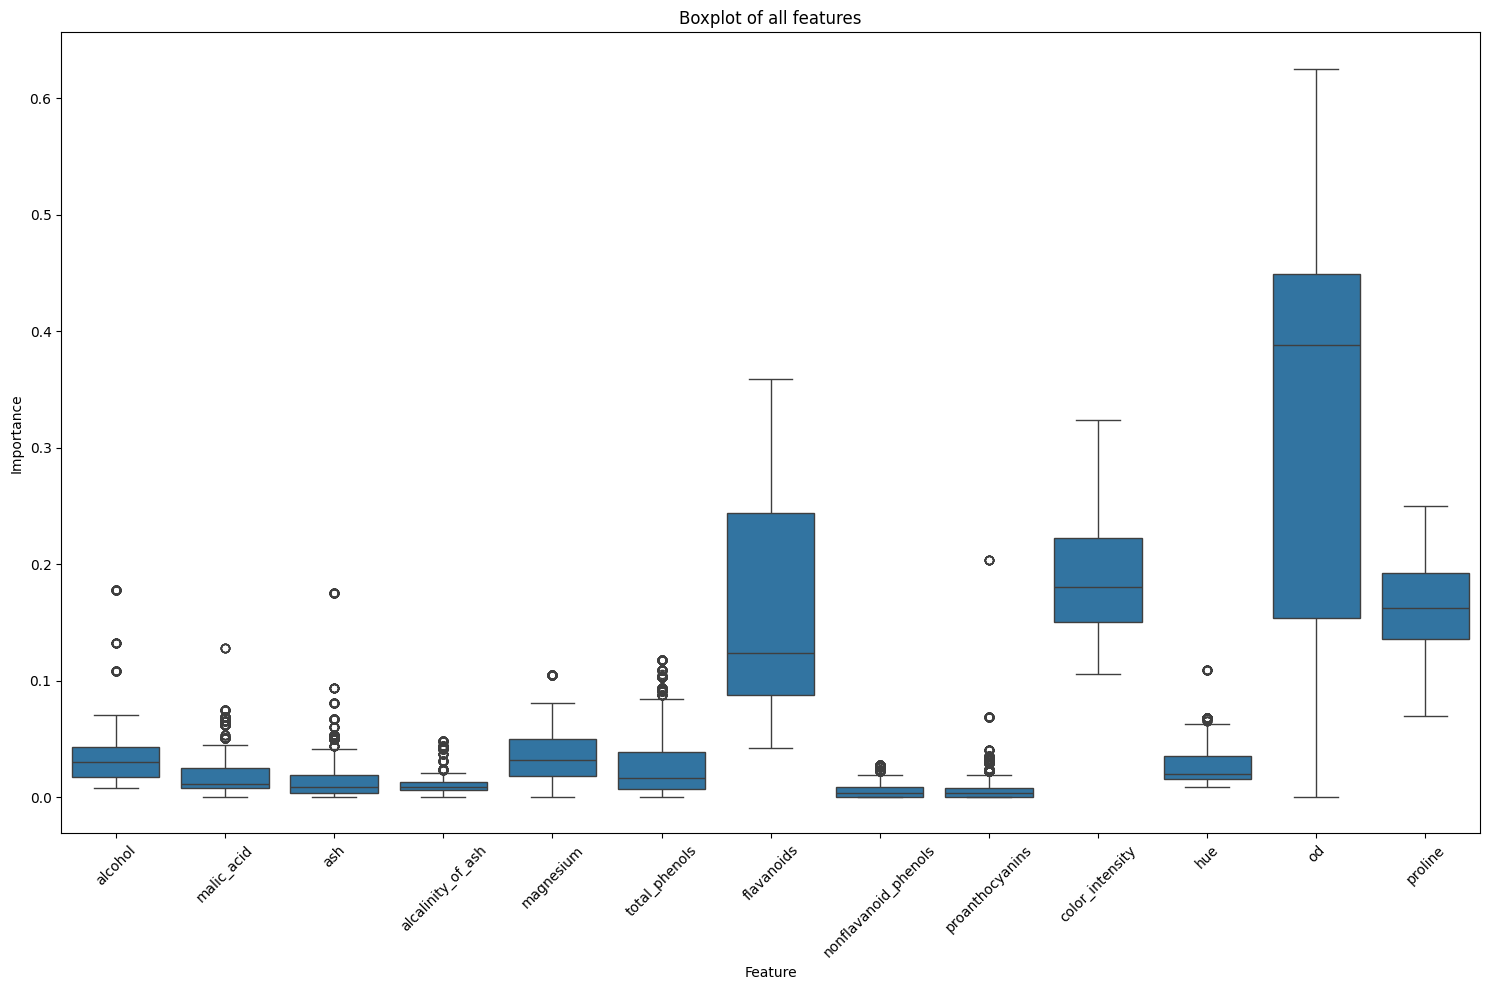

In [85]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Feature', y='Importance', data=feat_melted)

plt.xticks(rotation=45)  # Rotate labels for readability
plt.title('Feature Importances')
plt.tight_layout()
plt.show()